In [ ]:
import  numpy as np
import pandas as pd

In [2]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Dataset

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d zygmunt/goodbooks-10k

 43% 5.00M/11.6M [00:00<00:00, 31.6MB/s]
100% 11.6M/11.6M [00:00<00:00, 56.9MB/s]


In [4]:
!unzip goodbooks-10k -d Dataset

Archive:  goodbooks-10k.zip
  inflating: Dataset/book_tags.csv   
  inflating: Dataset/books.csv       
  inflating: Dataset/ratings.csv     
  inflating: Dataset/sample_book.xml  
  inflating: Dataset/tags.csv        
  inflating: Dataset/to_read.csv     


In [47]:
ratings=pd.read_csv('Dataset/ratings.csv')
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [48]:
books=pd.read_csv('Dataset/books.csv')

In [49]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [50]:
df2=books[['book_id','original_title']]

In [51]:
df=pd.merge(ratings,df2,on='book_id')

In [52]:
df.head()
df.dropna(axis=0,inplace=True)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')


In [54]:
df.groupby('original_title').mean().head()

,book_id,user_id,rating
original_title,,,
,9549.0,27375.704082,3.520408
Animal Farm & 1984,5472.0,20238.222222,3.797980
Carter Beats the Devil,4599.0,31598.300000,4.320000
The Fellowship of the Ring,34.0,30932.330000,2.770000
"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",9833.0,23779.979381,3.711340


In [55]:
df.groupby('original_title')['rating'].count().sort_values(ascending=False).head()

original_title
鋼の錬金術師 1                            100
Moonraker                           100
My Life in France                   100
My Friend Leonard                   100
Mrs. Frisby and the Rats of NIMH    100
Name: rating, dtype: int64

In [56]:
df2=pd.DataFrame(df.groupby('original_title')['rating'].mean())

In [57]:
df2.head()

,rating
original_title,
,3.520408
Animal Farm & 1984,3.797980
Carter Beats the Devil,4.320000
The Fellowship of the Ring,2.770000
"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",3.711340


In [58]:
df2['num_rating']=df.groupby('original_title')['rating'].count()

In [59]:
df2.head()

,rating,num_rating
original_title,,
,3.520408,98
Animal Farm & 1984,3.797980,99
Carter Beats the Devil,4.320000,100
The Fellowship of the Ring,2.770000,100
"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",3.711340,97


In [61]:
df2.dropna(axis=0,inplace=True)

In [62]:
df2.iloc[0]

rating         3.520408
num_rating    98.000000
Name:  , dtype: float64

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries,   to 鋼の錬金術師 1
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      794 non-null    float64
 1   num_rating  794 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 18.6+ KB


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77920 entries, 0 to 79700
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   book_id         77920 non-null  int64 
 1   user_id         77920 non-null  int64 
 2   rating          77920 non-null  int64 
 3   original_title  77920 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.0+ MB


In [69]:
df2.reset_index(inplace=True)

In [70]:
df2['len']=df2['original_title'].apply(lambda x: len(x))

In [71]:
df2.head()

,original_title,rating,num_rating,len
0,,3.520408,98,1
1,Animal Farm & 1984,3.797980,99,19
2,Carter Beats the Devil,4.320000,100,23
3,The Fellowship of the Ring,2.770000,100,27
4,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",3.711340,97,43


In [72]:
df2[df2['len']==1]

,original_title,rating,num_rating,len
0,,3.520408,98,1


In [74]:
df2.drop(0,axis=0,inplace=True)

In [75]:
df2.head()

,original_title,rating,num_rating,len
1,Animal Farm & 1984,3.797980,99,19
2,Carter Beats the Devil,4.320000,100,23
3,The Fellowship of the Ring,2.770000,100,27
4,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",3.711340,97,43
5,'Salem's Lot The Illustrated Edition,3.932432,74,36


In [76]:
df2.drop(['len'],axis=1,inplace=True)

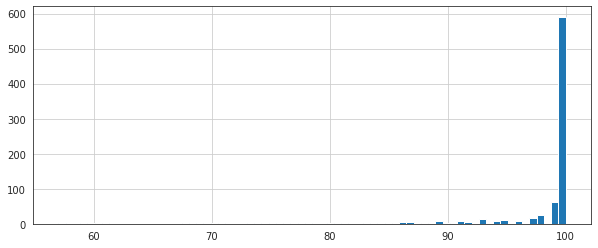

In [78]:
plt.figure(figsize=(10,4))
df2['num_rating'].hist(bins=70)

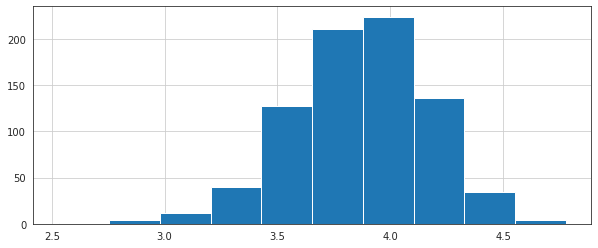

In [81]:
plt.figure(figsize=(10,4))
df2['rating'].hist()

In [85]:
df.head()

,book_id,user_id,rating,original_title
0,1,314,5,Harry Potter and the Half-Blood Prince
1,1,439,3,Harry Potter and the Half-Blood Prince
2,1,588,5,Harry Potter and the Half-Blood Prince
3,1,1169,4,Harry Potter and the Half-Blood Prince
4,1,1185,4,Harry Potter and the Half-Blood Prince


In [86]:
df3=df.pivot_table(index='user_id',columns='original_title',values='rating')

In [93]:
df3.head()

original_title,,Animal Farm & 1984,Carter Beats the Devil,The Fellowship of the Ring,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",'Salem's Lot The Illustrated Edition,'Tis: A Memoir,1421: The Year China Discovered America,1776,31 Songs,A Bend in the River,A Bend in the Road,A Brief History of Time: From the Big Bang to Black Holes,A Briefer History of Time,A Case of Need,A Christmas Carol,A Christmas Carol and Other Christmas Writings,A Fine Balance,A Great and Terrible Beauty,A Heartbreaking Work of Staggering Genius,"A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam",A History of the World in 6 Glasses,A Home at the End of the World,A House for Mr. Biswas,A Lesson Before Dying,A Little Princess,A Man Without a Country,A Map of the World,A Midsummer Night's Dream,A Million Little Pieces,A Modest Proposal and Other Satirical Works,A Moveable Feast,A Painted House,A People's History of the United States: 1492 to Present,A Portrait of the Artist as a Young Man,A Prayer for Owen Meany,A Raisin in the Sun,A Room with a View,A Separate Peace,A Short History of Nearly Everything,...,Where the Heart Is,While I Was Gone,White Teeth,Who Moved My Cheese?,Wild Fire,Wild Swans: Three Daughters of China,Witches Abroad,Wizard and Glass,Wolves of the Calla,Women in Love,World War Z: An Oral History of the Zombie War,World Without End,Wuthering Heights,Xenocide,Year of Wonders: A Novel of the Plague,You Shall Know Our Velocity!,Zen and the Art of Motorcycle Maintenance,Zodiac,number9dream,Λυσιστράτη,Οἰδίπους Τύραννος,Бесы,Братья Карамазовы,Война и миръ,Преступление и наказание,Рассказы и Повести,الأجنحة المتكسرة,Ἀγαμέμνων,Ἀντιγόνη,Ἰλιάς,Ἰλιάς ; Ὀδύσσεια,Ἰστορίαι,Ὀδύσσεια,Ὀρέστεια,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,スプートニクの恋人 [Supūtoniku no Koibito],海辺のカフカ [Umibe no Kafuka],砂の女 [Suna no onna],象の消滅 [Zō no shōmetsu],鋼の錬金術師 1
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df2.sort_values('rating',ascending=False).head(10)

,original_title,rating,num_rating
474,Still Life with Woodpecker,4.777778,99
504,The Beautiful and Damned,4.660000,100
738,Villa Incognito,4.618557,97
409,Peter and the Shadow Thieves,4.557143,70
669,The Taste of Home Cookbook,4.550000,100
33,A People's History of the United States: 1492 ...,4.540000,100
234,Hard Times: For These Times,4.535354,99
219,Girl with a Pearl Earring,4.530000,100
144,Deception Point,4.500000,100
169,El amor en los tiempos del cólera,4.500000,94


In [150]:
wood_pecker=df3['Still Life with Woodpecker']

In [151]:
similar_to_wood_pecker=df3.corrwith(wood_pecker)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [152]:
t=similar_to_wood_pecker.sort_values(ascending=False).head()

In [153]:
similar_to_woodpecker=pd.DataFrame(t,columns=['Corelation'])

In [154]:
similar_to_woodpecker.dropna(inplace=True)

In [155]:
similar_to_woodpecker.head()

,Corelation
original_title,
Still Life with Woodpecker,1.000000
Welcome to the Monkey House,1.000000
Emily of New Moon,0.866025
The Moonstone,0.707107
The Blank Slate: The Modern Denial of Human Nature,-1.000000


In [156]:
df4=similar_to_woodpecker

In [157]:
df5=pd.merge(df2,df4,on='original_title')

In [158]:
df5.dropna(inplace=True)

In [160]:
df5.sort_values('Corelation',ascending=False)[1:]

,original_title,rating,num_rating,Corelation
4,Welcome to the Monkey House,4.22,100,1.000000
0,Emily of New Moon,3.97,100,0.866025
3,The Moonstone,3.87,100,0.707107
2,The Blank Slate: The Modern Denial of Human Na...,4.29,100,-1.000000
